In [21]:
# Movie Rating Prediction with Python
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set seaborn style
sb.set(style="darkgrid", font="Calibri")
mpl.rcParams['figure.figsize'] = (12, 6)


In [3]:
# Cell 2: Load Dataset
movie_file = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
movie_file.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
# Cell 3: Check Basic Info
movie_file.info()
movie_file.describe()
movie_file.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [5]:
# Cell 4: Drop Rows with Missing Critical Values
movie_file.dropna(subset=['Rating', 'Votes', 'Genre', 'Director', 'Actor 1'], inplace=True)
movie_file.reset_index(drop=True, inplace=True)


In [8]:
# Cell 5: Clean Columns (Fixed for non-string values)
# Ensure columns are strings before using .str
movie_file['Duration'] = movie_file['Duration'].astype(str)
movie_file['Year'] = movie_file['Year'].astype(str)
movie_file['Votes'] = movie_file['Votes'].astype(str)

# Remove "min" from Duration and convert to numeric
movie_file['Duration'] = movie_file['Duration'].str.extract(r'(\d+)')
movie_file['Duration'] = pd.to_numeric(movie_file['Duration'], errors='coerce')

# Remove commas from Votes and convert to int
movie_file['Votes'] = movie_file['Votes'].str.replace(',', '')
movie_file['Votes'] = pd.to_numeric(movie_file['Votes'], errors='coerce')

# Convert Year to numeric
movie_file['Year'] = movie_file['Year'].str.extract(r'(\d{4})')
movie_file['Year'] = pd.to_numeric(movie_file['Year'], errors='coerce')

# Drop any remaining rows with missing numeric values
movie_file.dropna(subset=['Duration', 'Votes', 'Year'], inplace=True)
movie_file.reset_index(drop=True, inplace=True)


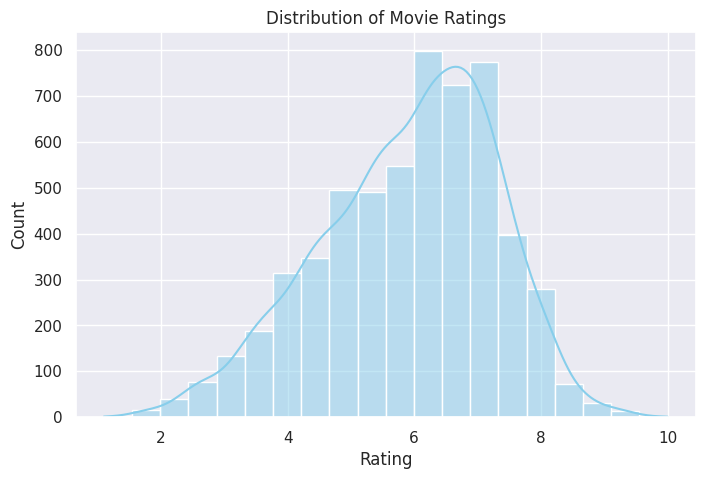

/tmp/ipython-input-783708508.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


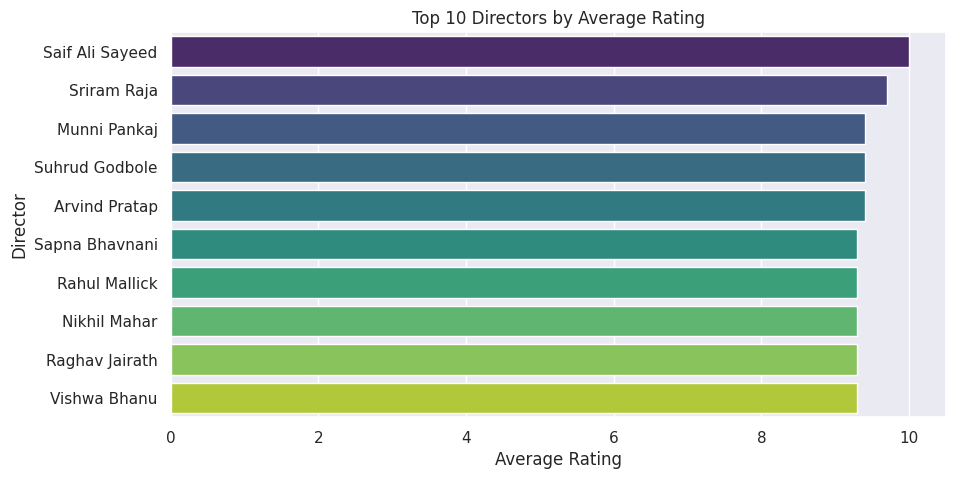

/tmp/ipython-input-783708508.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='magma')


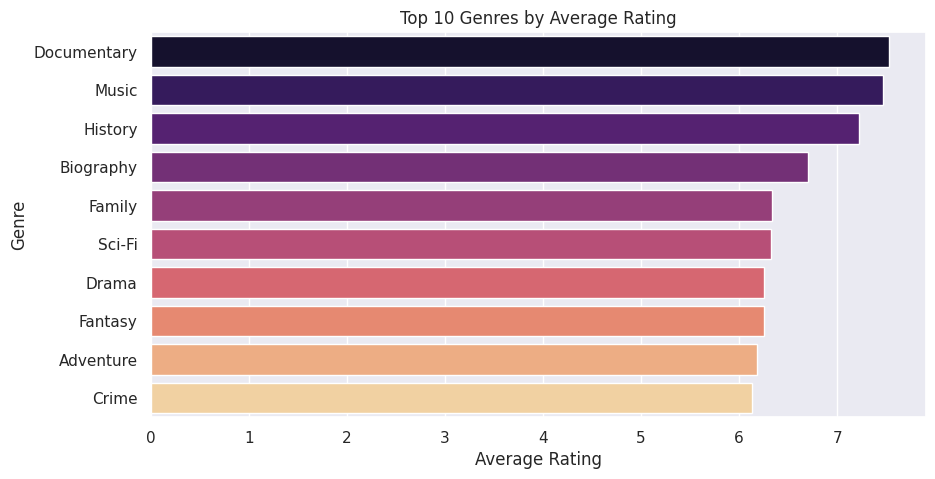

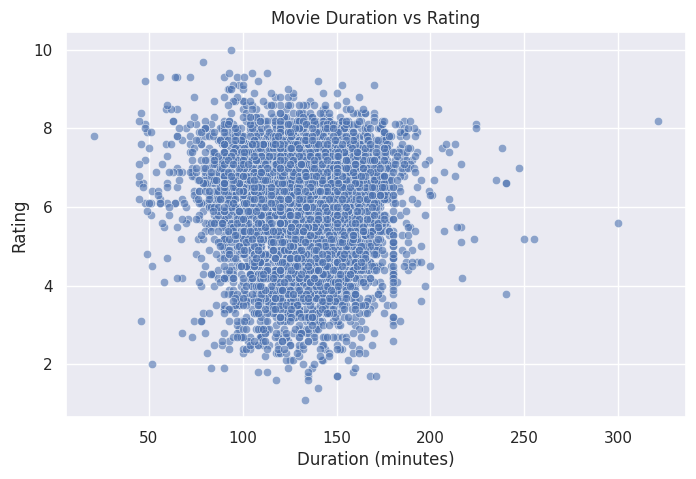

In [11]:
# Cell 6: Exploratory Data Analysis (EDA) with graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Use a generic font to avoid warnings
plt.rcParams['font.family'] = 'sans-serif'

# Plot distribution of Movie Ratings
plt.figure(figsize=(8,5))
sns.histplot(movie_file['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 directors by average rating
top_directors = movie_file.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

# Average rating by genre (first genre only if multiple)
movie_file['Primary_Genre'] = movie_file['Genre'].str.split(',').str[0]
genre_rating = movie_file.groupby('Primary_Genre')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='magma')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Duration vs Rating scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration', y='Rating', data=movie_file, alpha=0.6)
plt.title('Movie Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


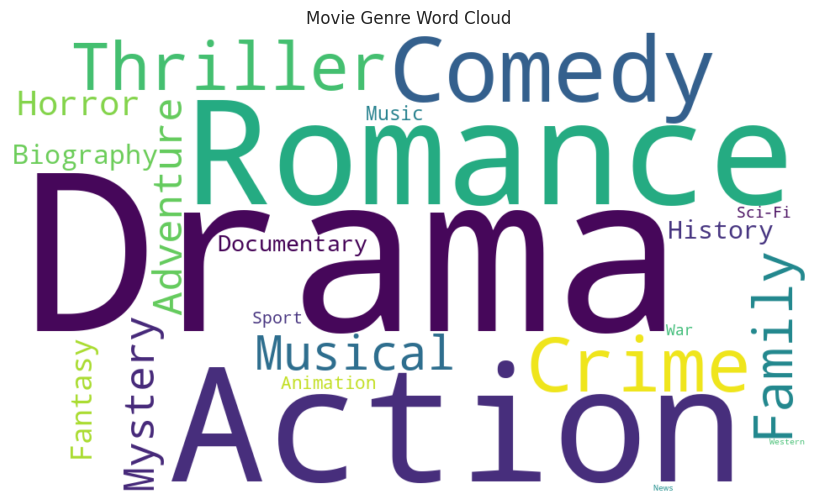

/tmp/ipython-input-1378468906.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


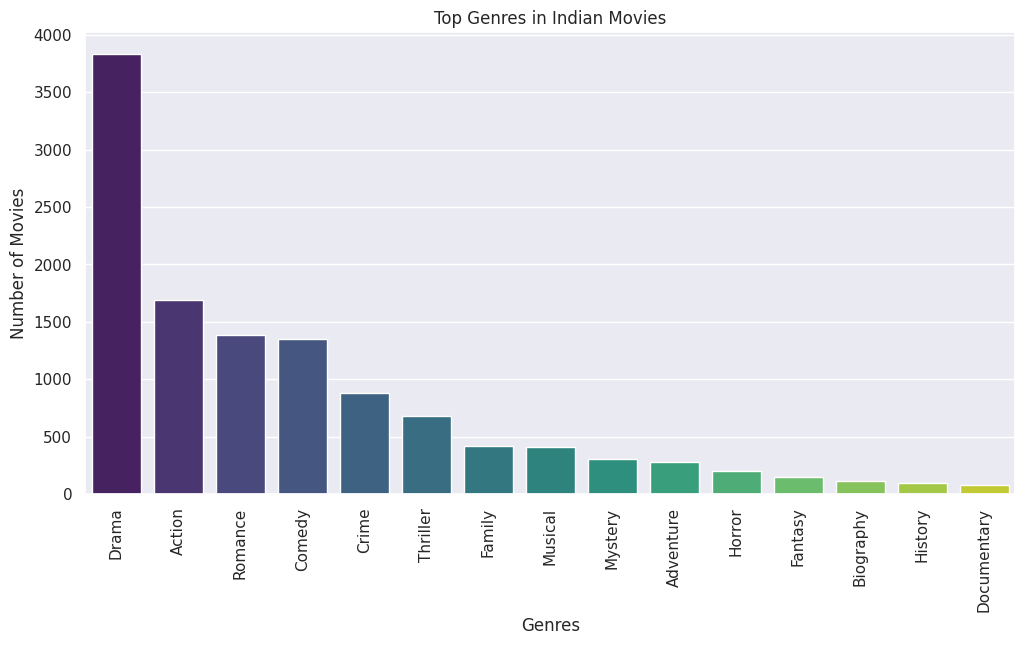

In [12]:
# Cell 7: Genre Analysis

# Count individual genres
genre_counts = movie_file['Genre'].str.split(', ', expand=True).stack().value_counts()

# WordCloud for genres
wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)
mpl.figure(figsize=(16,6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('off')
mpl.title("Movie Genre Word Cloud")
mpl.show()

# Bar plot of top genres
top_genres = genre_counts.head(15)
mpl.figure(figsize=(12,6))
sb.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
mpl.xticks(rotation=90)
mpl.title("Top Genres in Indian Movies")
mpl.ylabel("Number of Movies")
mpl.xlabel("Genres")
mpl.show()


/tmp/ipython-input-271311392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')


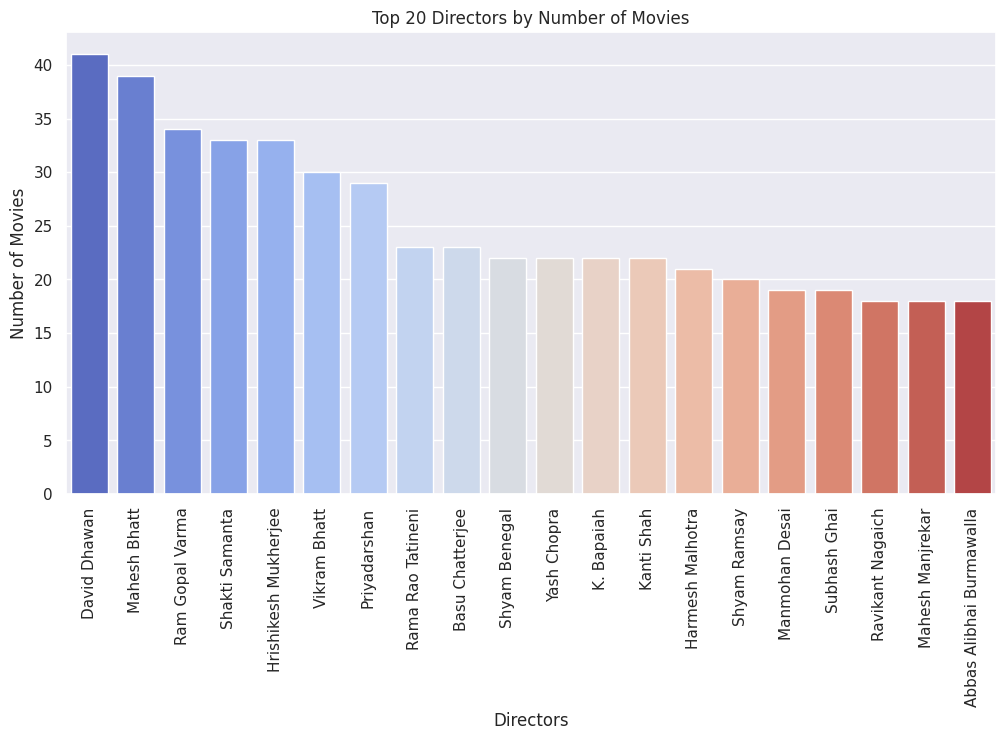

/tmp/ipython-input-271311392.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_actors.index, y=top_actors.values, palette='coolwarm')


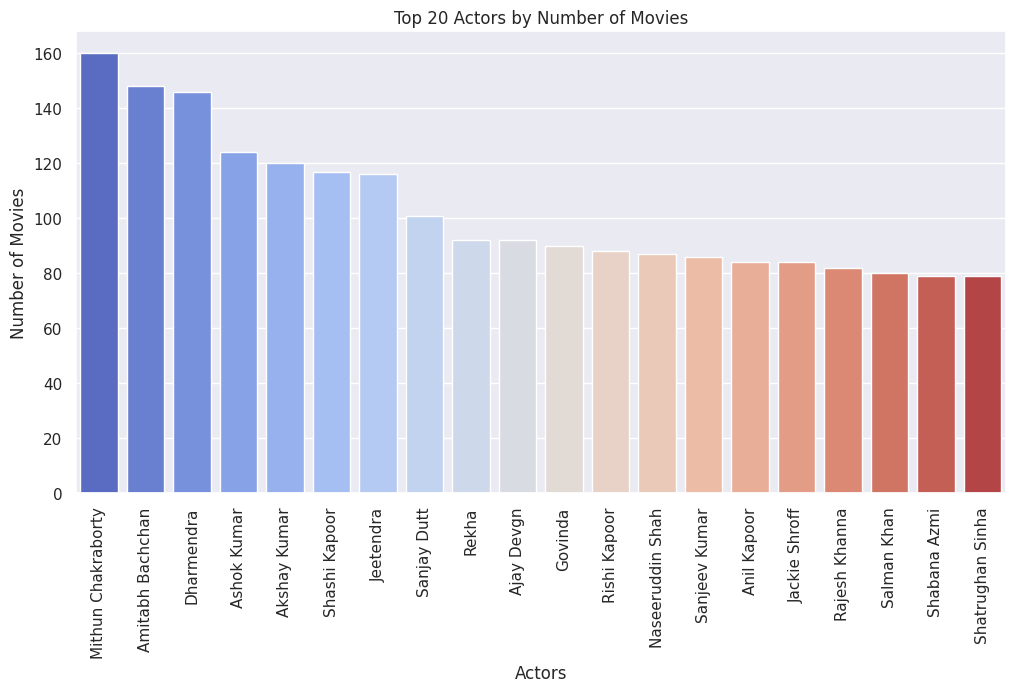

In [14]:
# Cell 8: Top Directors and Actors

# Top 20 Directors by movie count
top_directors = movie_file['Director'].value_counts().head(20)
mpl.figure(figsize=(12,6))
sb.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
mpl.xticks(rotation=90)
mpl.title("Top 20 Directors by Number of Movies")
mpl.ylabel("Number of Movies")
mpl.xlabel("Directors")
mpl.show()

# Top 20 Actors
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']]).dropna()
top_actors = actors.value_counts().head(20)
mpl.figure(figsize=(12,6))
sb.barplot(x=top_actors.index, y=top_actors.values, palette='coolwarm')
mpl.xticks(rotation=90)
mpl.title("Top 20 Actors by Number of Movies")
mpl.ylabel("Number of Movies")
mpl.xlabel("Actors")
mpl.show()


In [15]:
# Cell 9: Feature Engineering

# Combine actors into a single column
movie_file['Actors'] = movie_file['Actor 1'] + ', ' + movie_file['Actor 2'] + ', ' + movie_file['Actor 3']

# Encode categorical variables to numeric
movie_file['Director_Code'] = movie_file['Director'].astype('category').cat.codes
movie_file['Genre_Code'] = movie_file['Genre'].astype('category').cat.codes
movie_file['Actors_Code'] = movie_file['Actors'].astype('category').cat.codes

# Select features for modeling
features = ['Director_Code', 'Genre_Code', 'Actors_Code', 'Duration', 'Year', 'Votes']
target = 'Rating'


In [16]:
# Cell 10: Split Dataset
X = movie_file[features]
y = movie_file[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Cell 11: Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: -0.022017780601346626
Linear Regression RMSE: 1.3525530597521414


In [18]:
# Cell 12: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.36694025985517176
Random Forest RMSE: 1.0645043316839593


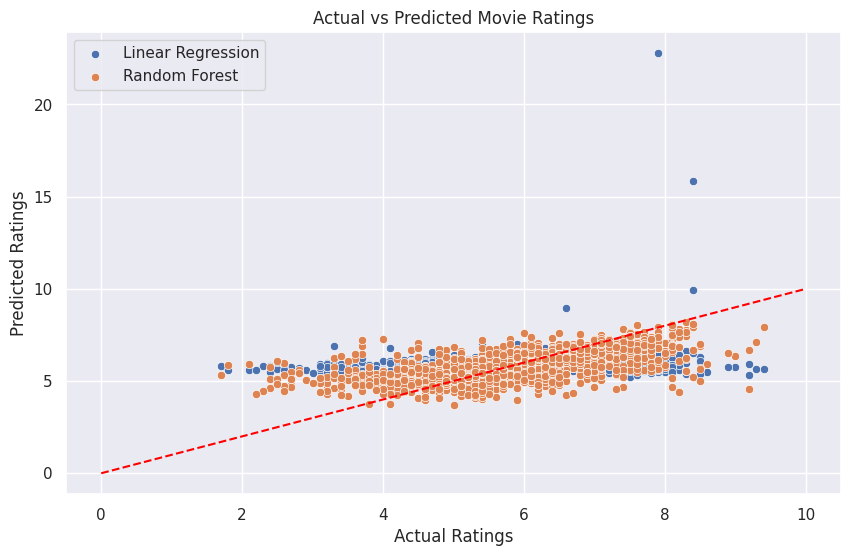

In [19]:
# Cell 13: Visual Comparison of Predictions
mpl.figure(figsize=(10,6))
sb.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression')
sb.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest')
mpl.plot([0,10],[0,10], color='red', linestyle='--')  # Perfect prediction line
mpl.xlabel("Actual Ratings")
mpl.ylabel("Predicted Ratings")
mpl.title("Actual vs Predicted Movie Ratings")
mpl.legend()
mpl.show()


In [20]:
# Cell 14: Predict Sample Movie
sample_movie = pd.DataFrame({
    'Director_Code':[movie_file['Director_Code'].iloc[0]],
    'Genre_Code':[movie_file['Genre_Code'].iloc[0]],
    'Actors_Code':[movie_file['Actors_Code'].iloc[0]],
    'Duration':[120],
    'Year':[2026],
    'Votes':[500]
})
pred_rating = rf_model.predict(sample_movie)
print("Predicted Rating for sample movie:", pred_rating[0])


Predicted Rating for sample movie: 6.141000000000004
